In [1]:
import os
import pandas as pd
import plotly.express as px

In [2]:
# Define the directory and file path (same as where you saved the file)
processed_dir = r'C:\Users\USER\Downloads\Perfume_E-Commerce\data\processed'
final_file = os.path.join(processed_dir, 'cleaned_perfume_data.csv')

# Load the cleaned perfume dataset
combined_df = pd.read_csv(final_file)

In [3]:
combined_df['location'] = combined_df['location'].str.strip()

## Stock Available by Type

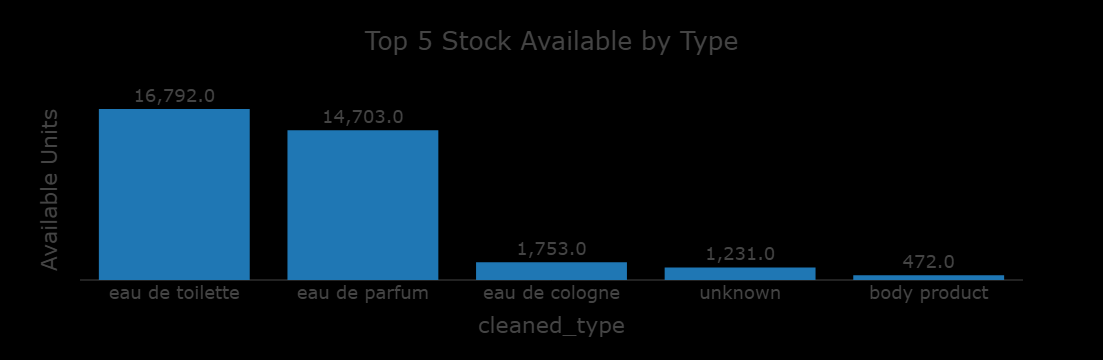

In [5]:
# Set results directory
results_dir = r'C:\Users\USER\Downloads\Perfume_E-Commerce\result'
os.makedirs(results_dir, exist_ok=True)

# Group and sum available stock by type
type_stock = combined_df.groupby('cleaned_type')['available'].sum().reset_index()

# Sort descending and take top 5
top5_type_stock = type_stock.sort_values(by='available', ascending=False).head(5)

# Create formatted labels with thousand separators
top5_type_stock['available_text'] = top5_type_stock['available'].apply(lambda x: f"{x:,}")

# Plot top 5 with same color and formatted data labels
fig1 = px.bar(
    top5_type_stock,
    x='cleaned_type',
    y='available',
    text='available_text',
    title='Top 5 Stock Available by Type',
    color_discrete_sequence=['#1f77b4']
)

# Data labels and layout tweaks
fig1.update_traces(textposition='outside', cliponaxis=False)

fig1.update_layout(
    template='presentation',
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)',
    xaxis={'categoryorder': 'total descending'},
    yaxis=dict(
        showline=False,
        showticklabels=False,
        showgrid=False,
        title='Available Units'
    )
)

# Display the figure
fig1.show()

# Export to image and HTML
fig1.write_image(os.path.join(results_dir, 'top5_stock_available_by_type.jpg'))
fig1.write_image(os.path.join(results_dir, 'top5_stock_available_by_type.png'))
fig1.write_html(os.path.join(results_dir, 'top5_stock_available_by_type.html'))

## Units Sold by Brand

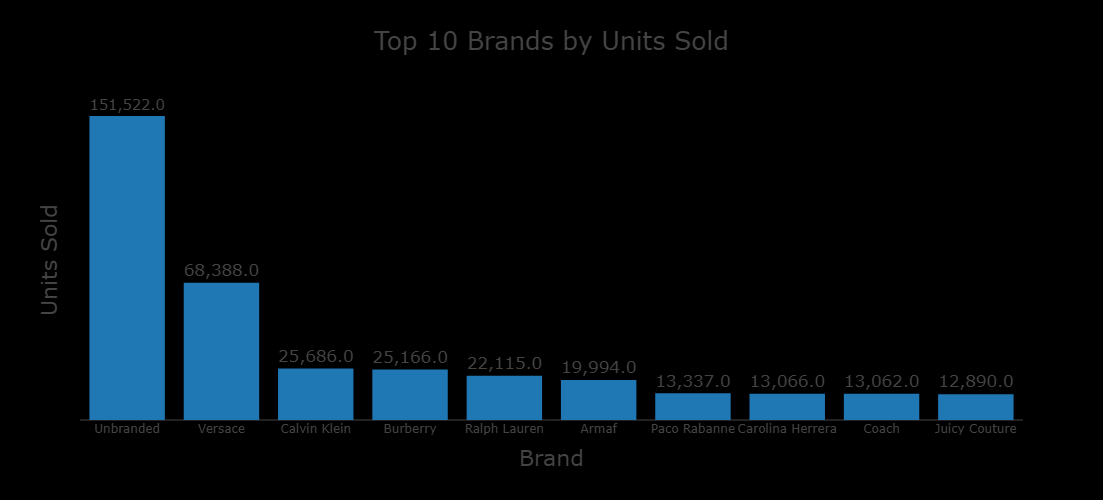

In [7]:
# Group and sum sold units by brand
brand_sold = combined_df.groupby('brand_cleaned')['sold'].sum().reset_index()

# Sort descending and take top 10
top10_brand_cleaned = brand_sold.sort_values(by='sold', ascending=False).head(10)

# Create formatted labels with thousand separators
top10_brand_cleaned['sold_text'] = top10_brand_cleaned['sold'].apply(lambda x: f"{x:,}")

# Plot top 10 brands with same color and formatted data labels
fig2 = px.bar(
    top10_brand_cleaned,
    x='brand_cleaned',
    y='sold',
    text='sold_text',
    title='Top 10 Brands by Units Sold',
    color_discrete_sequence=['#1f77b4']
)

# Show data labels above bars
fig2.update_traces(textposition='outside', cliponaxis=False)

# Style layout with dark theme, order bars descending
fig2.update_layout(
    template='presentation',
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)',
    height=500,
    width=1000,
    xaxis_tickangle=0,
    xaxis=dict(
        categoryorder='total descending',
        title='Brand',
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        showline=False,
        showticklabels=False,
        showgrid=False,
        title='Units Sold'
    )
)

fig2.show()

# Export chart files
fig2.write_image(os.path.join(results_dir, 'top10_brands_by_units_sold.jpg'))
fig2.write_image(os.path.join(results_dir, 'top10_brands_by_units_sold.png'))
fig2.write_html(os.path.join(results_dir, 'top10_brands_by_units_sold.html'))

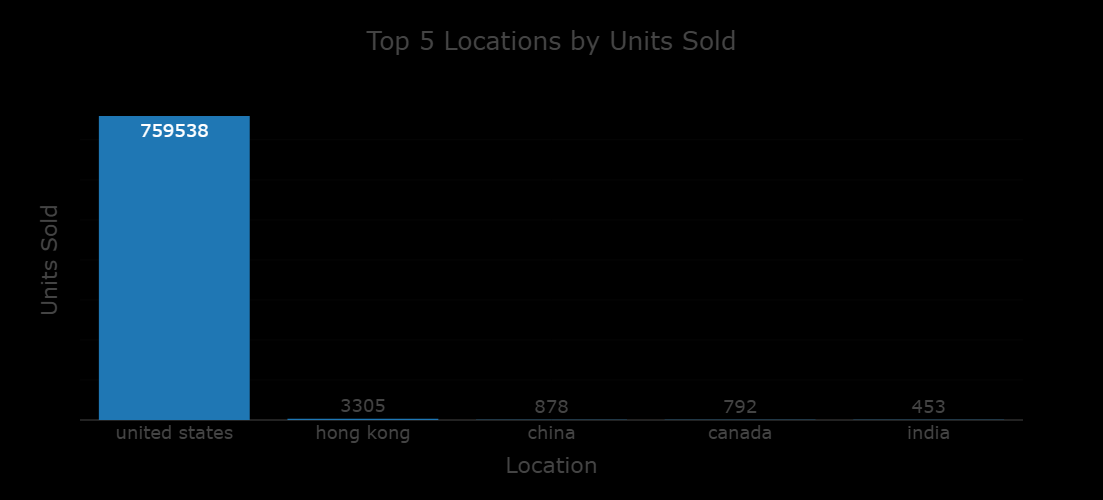

In [12]:
# Group and sum sold units by location
location_sold = combined_df.groupby('location')['sold'].sum().reset_index()

# Sort descending and take top 5
top5_location_sold = location_sold.sort_values(by='sold', ascending=False).head(5)

# (Optional) Format sold numbers with commas
top5_location_sold['sold_text'] = top5_location_sold['sold'].apply(lambda x: f"{x:,}")

# Create the figure
fig3 = px.bar(
    top5_location_sold,
    x='location',
    y='sold',
    title='Top 5 Locations by Units Sold',
    color_discrete_sequence=['#1f77b4'],
    text='sold'
)

# Customize layout (optional)
fig3.update_layout(
    template='presentation',
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)',
    height=500,
    width=1000,
    xaxis=dict(tickangle=0, title='Location'),
    yaxis=dict(showticklabels=False, title='Units Sold')
)

# Show the figure
fig3.show()

# Export files
results_dir = r"C:\Users\USER\Downloads\Perfume_E-Commerce\result"
os.makedirs(results_dir, exist_ok=True)

fig3.write_image(os.path.join(results_dir, 'top5_locations_by_units_sold.jpg'))
fig3.write_image(os.path.join(results_dir, 'top5_locations_by_units_sold.png'))
fig3.write_html(os.path.join(results_dir, 'top5_locations_by_units_sold.html'))

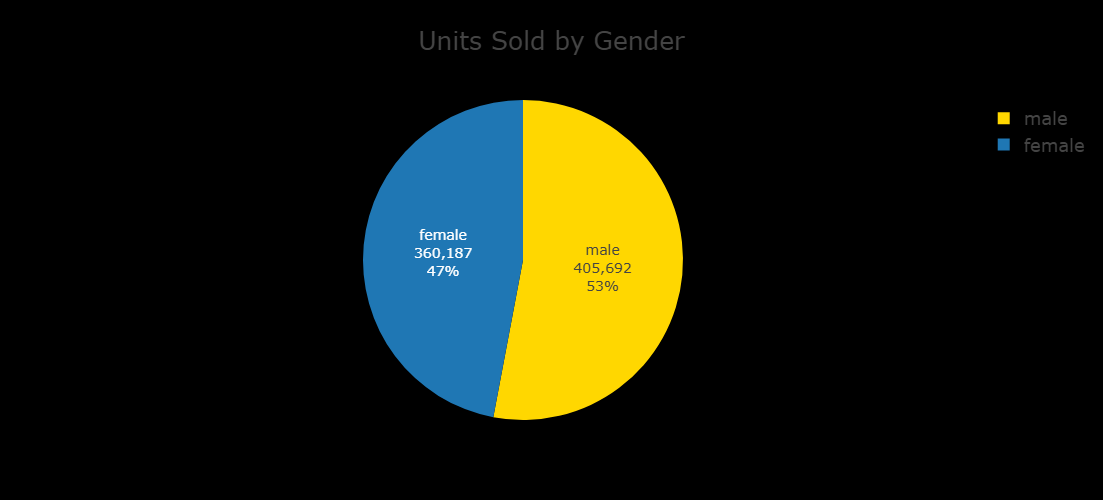

In [14]:
# Group and sum sold units by gender
gender_sold = combined_df.groupby('gender')['sold'].sum().reset_index()

# Create pie chart
fig4 = px.pie(
    gender_sold,
    names='gender',
    values='sold',
    title='Units Sold by Gender',
    color='gender',
    color_discrete_sequence=['#1f77b4', '#FFD700']
)

# Update layout: dark theme, fixed size
fig4.update_layout(
    template='presentation',
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)',
    height=500,
    width=700
)

# Optional: show label + percent + value
fig4.update_traces(textinfo='label+percent+value', textfont_size=14)

# Show figure
fig4.show()

# Optional: Save chart
results_dir = r"C:\Users\USER\Downloads\Perfume_E-Commerce\result"
os.makedirs(results_dir, exist_ok=True)

fig4.write_image(os.path.join(results_dir, 'units_sold_by_gender.jpg'))
fig4.write_image(os.path.join(results_dir, 'units_sold_by_gender.png'))
fig4.write_html(os.path.join(results_dir, 'units_sold_by_gender.html'))


C:\Users\USER\AppData\Local\Temp\ipykernel_9880\3360552871.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER\AppData\Local\Temp\ipykernel_9880\3360552871.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



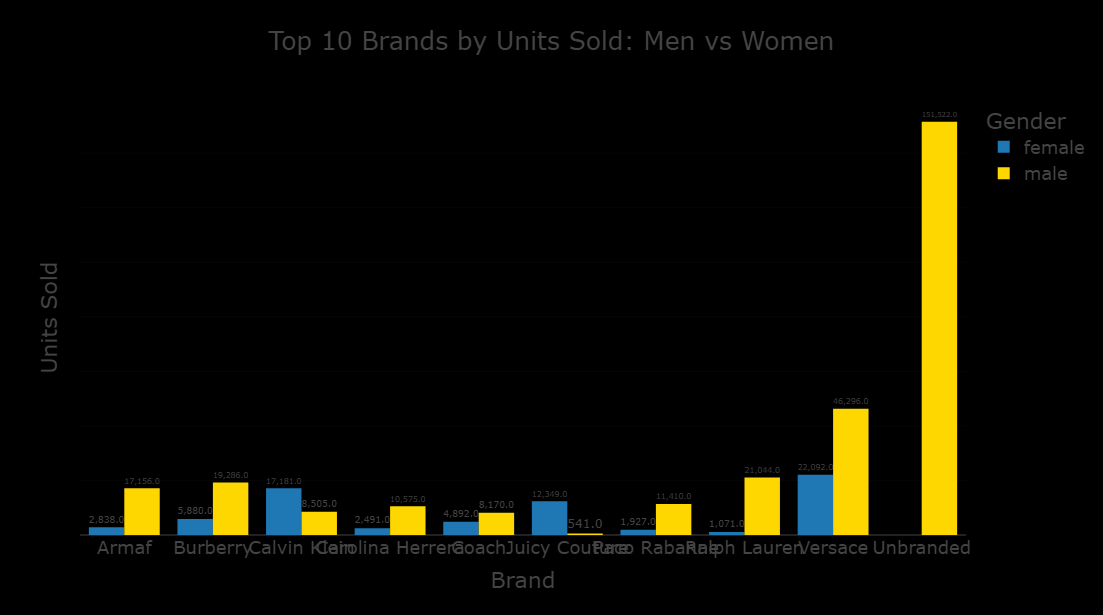

In [16]:
# 1. Group and sum units sold by brand and gender
sold_by_brand_gender = combined_df.groupby(['brand_cleaned', 'gender'])['sold'].sum().reset_index()

# 2. Total units sold by brand (to get top brands)
total_sold_by_brand = sold_by_brand_gender.groupby('brand_cleaned')['sold'].sum().reset_index()

# 3. Select top 10 brands by total sold
top10_brands = total_sold_by_brand.sort_values(by='sold', ascending=False).head(10)['brand_cleaned']

# 4. Filter original grouped data for these top 10 brands only
sold_top10 = sold_by_brand_gender[sold_by_brand_gender['brand_cleaned'].isin(top10_brands)]

# 5. Set categorical order for x-axis to keep bars in descending order
sold_top10['brand_cleaned'] = pd.Categorical(sold_top10['brand_cleaned'], categories=top10_brands, ordered=True)

# 6. Add formatted text labels with thousand separators
sold_top10['sold_text'] = sold_top10['sold'].apply(lambda x: f"{x:,}")

# 7. Create grouped bar chart comparing men and women
fig = px.bar(
    sold_top10,
    x='brand_cleaned',
    y='sold',
    color='gender',
    barmode='group',
    text='sold_text',
    title='Top 10 Brands by Units Sold: Men vs Women',
    labels={
        'brand_cleaned': 'Brand',
        'sold': 'Units Sold',
        'gender': 'Gender'
    },
    color_discrete_sequence=['#1f77b4', '#FFD700']
)

# 8. Customize labels and layout
fig.update_traces(textposition='outside', textfont_size=14)

fig.update_yaxes(showticklabels=False, title_text='Units Sold')

fig.update_layout(
    template='presentation',
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(0, 0, 0)',
    xaxis_tickangle=0,
    height=600,
    width=1500,
    margin=dict(t=100),
    legend_title_text='Gender'
)

fig.show()

# Export chart to JPG and PNG images
fig.write_image(os.path.join(results_dir, 'top10_brands_units_sold_men_vs_women.jpg'))
fig.write_image(os.path.join(results_dir, 'top10_brands_units_sold_men_vs_women.png'))

# Export interactive HTML version
fig.write_html(os.path.join(results_dir, 'top10_brands_units_sold_men_vs_women.html'))